In [3]:
import pandas as pd

datos = pd.read_csv("../U4_01_housing.csv")

In [4]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


TypeError: cannot convert the series to <class 'float'>

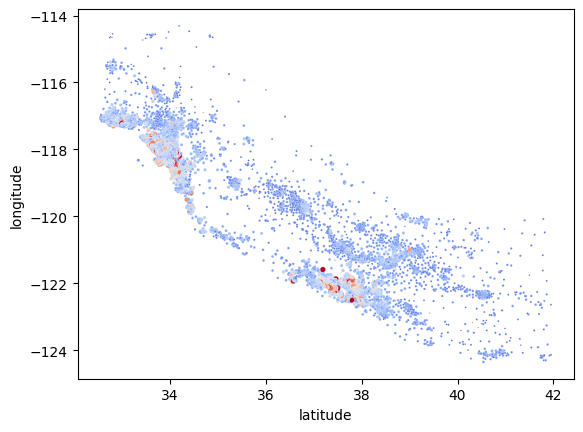

In [8]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="median_income", s=datos["median_income"], palette="coolwarm")

In [11]:
datos.loc[:, ["latitude", "longitude", "median_income"]]


,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


In [17]:
from sklearn.cluster import KMeans

x = datos.loc[:, ["latitude", "longitude", "median_income"]]

modelo = KMeans(n_clusters= 6)

predicciones = modelo.fit_predict(x)

In [18]:
x["segmento_economico"]= predicciones

In [15]:
x["segmento_economico"].value_counts()

segmento_economico
1    9503
0    8450
2    2687
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

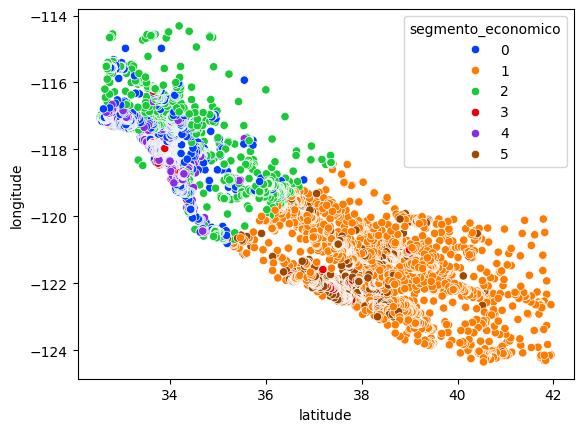

In [19]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=x, hue="segmento_economico", palette="bright")

<Axes: xlabel='segmento_economico', ylabel='count'>

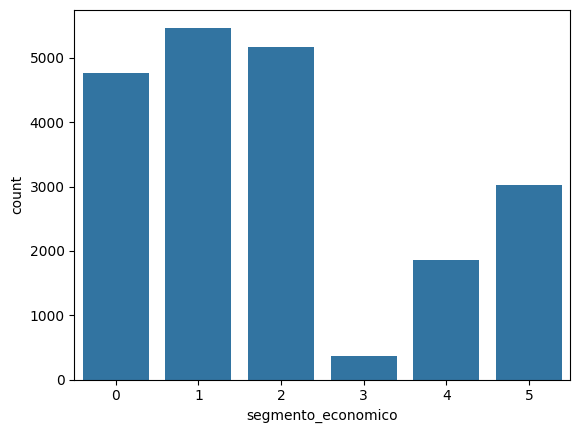

In [22]:
sb.countplot(x=x["segmento_economico"], data=x)

In [25]:
x.groupby(["segmento_economico"])["median_income"].mean()

segmento_economico
0     4.187073
1     2.741431
2     2.376060
3    11.492674
4     6.573076
5     5.395518
Name: median_income, dtype: float64